In [1]:
import keras
from keras import optimizers
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from keras.callbacks import LearningRateScheduler, TensorBoard
# load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

Using TensorFlow backend.


<h1>Hyperparameter</h1>

In [2]:
epochs = 10
def scheduler(epoch):
    if epoch < 100:
        return 0.01
    if epoch < 150:
        return 0.005
    return 0.001

<h1>Placeholder</h1>

<h1>LeNet-5</h1>

In [6]:
def build_model():
    model = Sequential()
    model.add(Conv2D(6, (5, 5), padding='valid', activation = 'relu', kernel_initializer='he_normal', input_shape=(32,32,3)))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(16, (5, 5), padding='valid', activation = 'relu', kernel_initializer='he_normal'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(120, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dense(84, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))
    sgd = optimizers.SGD(lr=.1, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model
# build network
model = build_model()

# set callback
tb_cb = TensorBoard(log_dir='./lenet', histogram_freq=0)
change_lr = LearningRateScheduler(scheduler)
cbks = [change_lr,tb_cb]

<h1>Cost and Optimization</h1>

<h1>Training, validation and testing</h1>
<h2>Train your model only 10 epochs.</h2>
<h2>1.Print out validation accuracy after each training epoch</h2>
<h2>2.Print out training time for each training epoch</h2>
<h2>3.Print out testing accuracy</h2>

In [4]:
# start train
history =model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          callbacks=cbks,
          validation_data=(x_test, y_test),
          shuffle=True)
#reference:github.com/BIGBALLON/cifar-10-cnn/tree/master/1_Lecun_Network


Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 4s 72us/step - loss: 1.7691 - acc: 0.3575 - val_loss: 1.5502 - val_acc: 0.4402
Epoch 2/10
50000/50000 [==============================] - 2s 49us/step - loss: 1.4306 - acc: 0.4887 - val_loss: 1.4126 - val_acc: 0.4934
Epoch 3/10
50000/50000 [==============================] - 2s 49us/step - loss: 1.3255 - acc: 0.5276 - val_loss: 1.3691 - val_acc: 0.5092
Epoch 4/10
50000/50000 [==============================] - 2s 48us/step - loss: 1.2573 - acc: 0.5531 - val_loss: 1.2807 - val_acc: 0.5425
Epoch 5/10
50000/50000 [==============================] - 2s 49us/step - loss: 1.2023 - acc: 0.5732 - val_loss: 1.2436 - val_acc: 0.5569
Epoch 6/10
50000/50000 [==============================] - 2s 48us/step - loss: 1.1605 - acc: 0.5885 - val_loss: 1.2247 - val_acc: 0.5695
Epoch 7/10
50000/50000 [==============================] - 2s 49us/step - loss: 1

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

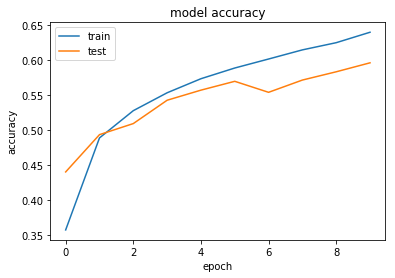

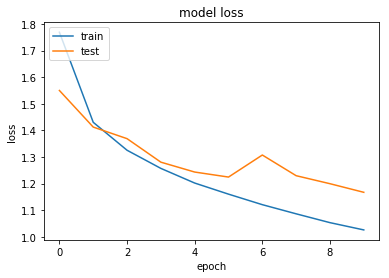

In [5]:
# summarize history for accuracy
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()